In [1]:
# First, we import seaborn, numpy, pandas, and matplotlib 
%matplotlib inline

import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Read in the Events Dataframe CSV file
events = pd.read_csv('archive/events.csv')
events.head()

,id_odsp,id_event,sort_order,time,text,event_type,event_type2,side,event_team,opponent,...,player_in,player_out,shot_place,shot_outcome,is_goal,location,bodypart,assist_method,situation,fast_break
0,UFot0hit/,UFot0hit1,1,2,Attempt missed. Mladen Petric (Hamburg) left f...,1,12.0,2,Hamburg SV,Borussia Dortmund,...,NaN,NaN,6.0,2.0,0,9.0,2.0,1,1.0,0
1,UFot0hit/,UFot0hit2,2,4,"Corner, Borussia Dortmund. Conceded by Dennis...",2,NaN,1,Borussia Dortmund,Hamburg SV,...,NaN,NaN,NaN,NaN,0,NaN,NaN,0,NaN,0
2,UFot0hit/,UFot0hit3,3,4,"Corner, Borussia Dortmund. Conceded by Heiko ...",2,NaN,1,Borussia Dortmund,Hamburg SV,...,NaN,NaN,NaN,NaN,0,NaN,NaN,0,NaN,0
3,UFot0hit/,UFot0hit4,4,7,Foul by Sven Bender (Borussia Dortmund).,3,NaN,1,Borussia Dortmund,Hamburg SV,...,NaN,NaN,NaN,NaN,0,NaN,NaN,0,NaN,0
4,UFot0hit/,UFot0hit5,5,7,Gokhan Tore (Hamburg) wins a free kick in the ...,8,NaN,2,Hamburg SV,Borussia Dortmund,...,NaN,NaN,NaN,NaN,0,2.0,NaN,0,NaN,0


In [3]:
# Read in the Game Info Dataframe CSV file
game_info = pd.read_csv('archive/ginf.csv')
game_info.head()

,id_odsp,link_odsp,adv_stats,date,league,season,country,ht,at,fthg,ftag,odd_h,odd_d,odd_a,odd_over,odd_under,odd_bts,odd_bts_n
0,UFot0hit/,/soccer/germany/bundesliga-2011-2012/dortmund-...,True,2011-08-05,D1,2012,germany,Borussia Dortmund,Hamburg SV,3,1,1.56,4.41,7.42,NaN,NaN,NaN,NaN
1,Aw5DflLH/,/soccer/germany/bundesliga-2011-2012/augsburg-...,True,2011-08-06,D1,2012,germany,FC Augsburg,SC Freiburg,2,2,2.36,3.60,3.40,NaN,NaN,NaN,NaN
2,bkjpaC6n/,/soccer/germany/bundesliga-2011-2012/werder-br...,True,2011-08-06,D1,2012,germany,Werder Bremen,Kaiserslautern,2,0,1.83,4.20,4.80,NaN,NaN,NaN,NaN
3,CzPV312a/,/soccer/france/ligue-1-2011-2012/paris-sg-lori...,True,2011-08-06,F1,2012,france,Paris Saint-Germain,Lorient,0,1,1.55,4.50,9.40,NaN,NaN,NaN,NaN
4,GUOdmtII/,/soccer/france/ligue-1-2011-2012/caen-valencie...,True,2011-08-06,F1,2012,france,Caen,Valenciennes,1,0,2.50,3.40,3.45,NaN,NaN,NaN,NaN


In [4]:
# Read in the Dictionary txt file as a table to easily encode the events
dictionary = pd.read_table('archive/dictionary.txt', delim_whitespace=False, names=('num','events'))
event_type=dictionary[1:13]
event_type_2=dictionary[14:18]
side=dictionary[19:21]
shot_place=dictionary[22:35]
shot_outcome=dictionary[36:40]
location=dictionary[41:60]
bodypart=dictionary[61:64]
assist_method=dictionary[65:70]
situition=dictionary[71:75]

In [5]:
# Add python dictionary strings to the integers values to more easily carry out analysis
event_types = {1:'Attempt', 2:'Corner', 3:'Foul', 4:'Yellow card', 5:'Second yellow card', 6:'Red card', 7:'Substitution', 8:'Free kick won', 9:'Offside', 10:'Hand ball', 11:'Penalty conceded'}
event_types2 = {12:'Key Pass', 13:'Failed through ball', 14:'Sending off', 15:'Own goal'}
sides = {1:'Home', 2:'Away'}
shot_places = {1:'Bit too high', 2:'Blocked', 3:'Bottom left corner', 4:'Bottom right corner', 5:'Centre of the goal', 6:'High and wide', 7:'Hits the bar', 8:'Misses to the left', 9:'Misses to the right', 10:'Too high', 11:'Top centre of the goal', 12:'Top left corner', 13:'Top right corner'}
shot_outcomes = {1:'On target', 2:'Off target', 3:'Blocked', 4:'Hit the bar'}
locations = {1:'Attacking half', 2:'Defensive half', 3:'Centre of the box', 4:'Left wing', 5:'Right wing', 6:'Difficult angle and long range', 7:'Difficult angle on the left', 8:'Difficult angle on the right', 9:'Left side of the box', 10:'Left side of the six yard box', 11:'Right side of the box', 12:'Right side of the six yard box', 13:'Very close range', 14:'Penalty spot', 15:'Outside the box', 16:'Long range', 17:'More than 35 yards', 18:'More than 40 yards', 19:'Not recorded'}
bodyparts = {1:'right foot', 2:'left foot', 3:'head'}
assist_methods = {1:'Pass', 2:'Cross', 3:'Headed pass', 4:'Through ball'}
situations = {1:'Open play', 2:'Set piece', 3:'Corner', 4:'Free kick'}

In [6]:
# Map the old integer value event columns to the new integer, string columns
events['event_type'] =   events['event_type'].map(event_types)
events['event_type2'] =  events['event_type2'].map(event_types2)
events['side'] =         events['side'].map(sides)
events['shot_place'] =   events['shot_place'].map(shot_places)
events['shot_outcome']=  events['shot_outcome'].map(shot_outcomes)
events['location'] =     events['location'].map(locations)
events['bodypart'] =     events['bodypart'].map(bodyparts)
events['assist_method']= events['assist_method'].map(assist_methods)
events['situation'] =    events['situation'].map(situations)

In [7]:
# Merge the Game Info Dataframe and the Events Dataframe into one big dataframe in order to create our subset
events = events.merge(game_info ,how = 'left')
# Filtering so that we only include the events in Premier League seasons
pl_events = events[events['league'] == 'E0']

In [8]:
# Fill missing values of the features I am interested in with new class 'unknown'
pl_events.shot_place.fillna('UNK', inplace= True)
pl_events.player.fillna('UNK', inplace= True)
pl_events.shot_outcome.fillna('UNK', inplace= True)
pl_events.bodypart.fillna('UNK', inplace= True)
pl_events.location.fillna('UNK', inplace= True)
pl_events.assist_method.fillna('UNK', inplace= True)
pl_events.situation.fillna('UNK', inplace= True);

C:\Users\dmsta\AppData\Local\Temp\ipykernel_5632\48022400.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pl_events.shot_place.fillna('UNK', inplace= True)
C:\Users\dmsta\AppData\Local\Temp\ipykernel_5632\48022400.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pl_events.player.fillna('UNK', inplace= True)
C:\Users\dmsta\AppData\Local\Temp\ipykernel_5632\48022400.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pl_events.sho

In [9]:
# Check the null values and Dtype of the columns
pl_events.info()

<class 'pandas.core.frame.DataFrame'>
Index: 118920 entries, 330964 to 940689
Data columns (total 39 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   id_odsp        118920 non-null  object 
 1   id_event       118920 non-null  object 
 2   sort_order     118920 non-null  int64  
 3   time           118920 non-null  int64  
 4   text           118920 non-null  object 
 5   event_type     118920 non-null  object 
 6   event_type2    30692 non-null   object 
 7   side           118920 non-null  object 
 8   event_team     118920 non-null  object 
 9   opponent       118920 non-null  object 
 10  player         118920 non-null  object 
 11  player2        41431 non-null   object 
 12  player_in      7178 non-null    object 
 13  player_out     7178 non-null    object 
 14  shot_place     118920 non-null  object 
 15  shot_outcome   118920 non-null  object 
 16  is_goal        118920 non-null  int64  
 17  location       118920 non-nul

In [10]:
# Change types of categorical and boolean variables
pl_events['event_type'] =   pl_events['event_type'].astype('category')
pl_events['event_type2'] =  pl_events['event_type2'].astype('category')
pl_events['side'] =         pl_events['side'].astype('category')
pl_events['shot_place'] =   pl_events['shot_place'].astype('category')
pl_events['shot_outcome']=  pl_events['shot_outcome'].astype('category')
pl_events['location'] =     pl_events['location'].astype('category')
pl_events['bodypart'] =     pl_events['bodypart'].astype('category')
pl_events['assist_method']= pl_events['assist_method'].astype('category')
pl_events['situation'] =    pl_events['situation'].astype('category')
pl_events['is_goal'] =      pl_events['is_goal'].astype('bool')


C:\Users\dmsta\AppData\Local\Temp\ipykernel_5632\1854479926.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pl_events['event_type'] =   pl_events['event_type'].astype('category')
C:\Users\dmsta\AppData\Local\Temp\ipykernel_5632\1854479926.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pl_events['event_type2'] =  pl_events['event_type2'].astype('category')
C:\Users\dmsta\AppData\Local\Temp\ipykernel_5632\1854479926.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from 

In [11]:
# Create an Attempt and Goal Dataframe
df_attempt = pl_events[pl_events['event_type'] == 'Attempt']
df_attempt = df_attempt[df_attempt['location'] != 'Not recorded']
df_attempt = df_attempt[df_attempt['location'] != 'UNK']
df_goal = df_attempt[df_attempt['is_goal'] == True]

<Axes: >

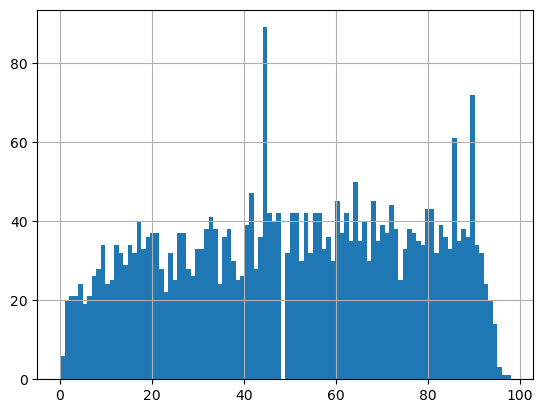

In [12]:

 df_goal['time'].hist(bins = 100)

C:\Users\dmsta\AppData\Local\Temp\ipykernel_5632\3613069769.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  attempt_locations = df_attempt.groupby('location').count().reset_index()
C:\Users\dmsta\AppData\Local\Temp\ipykernel_5632\3613069769.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  goal_locations = df_goal.groupby('location').count().reset_index()


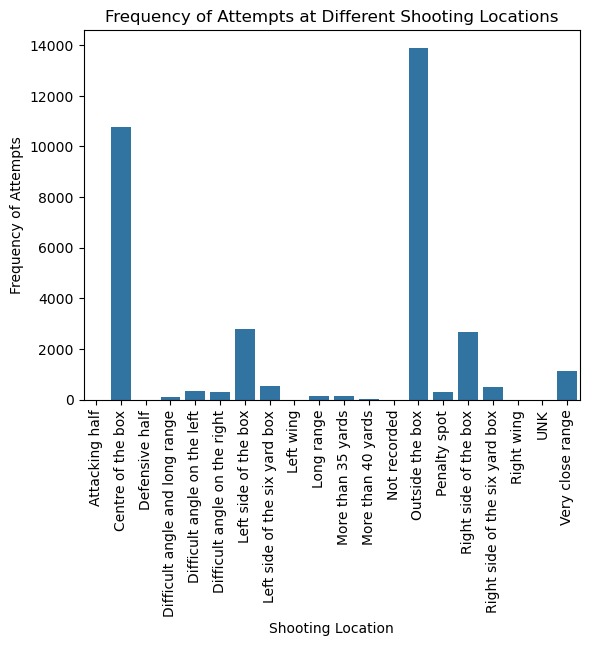

In [13]:
# Using the groupby and count functions to calculate the frequency of attempts and goals each location had
attempt_locations = df_attempt.groupby('location').count().reset_index()
goal_locations = df_goal.groupby('location').count().reset_index()
attempt_locations_bar = sns.barplot(x = 'location', y = 'id_event', data = attempt_locations)
plt.xticks(rotation = 'vertical')
plt.xlabel('Shooting Location')
plt.ylabel('Frequency of Attempts')
plt.title('Frequency of Attempts at Different Shooting Locations')
plt.show();

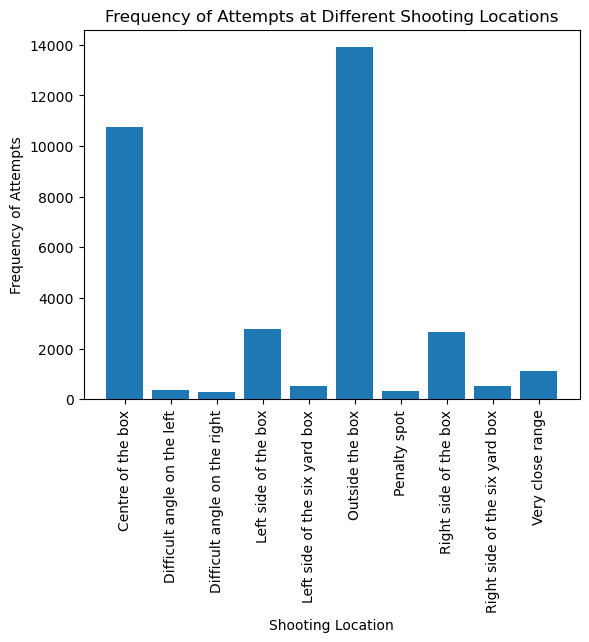

In [14]:
# Filtering out locations where no goals where scored or where it was not recorded
attempt_locations_filtered = attempt_locations[goal_locations['id_event'] > 10]
attempt_locations_filtered = attempt_locations_filtered[attempt_locations_filtered['location'] != 'Not recorded'] 
attempt_locations_filtered_bar = plt.bar(attempt_locations_filtered['location'],attempt_locations_filtered['id_event'])
plt.xlabel('Shooting Location')
plt.ylabel('Frequency of Attempts')
plt.title('Frequency of Attempts at Different Shooting Locations')
plt.xticks(rotation = 'vertical')
plt.show();

C:\Users\dmsta\AppData\Local\Temp\ipykernel_5632\2646803155.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colour_map = plt.cm.get_cmap('tab10', num_colours)


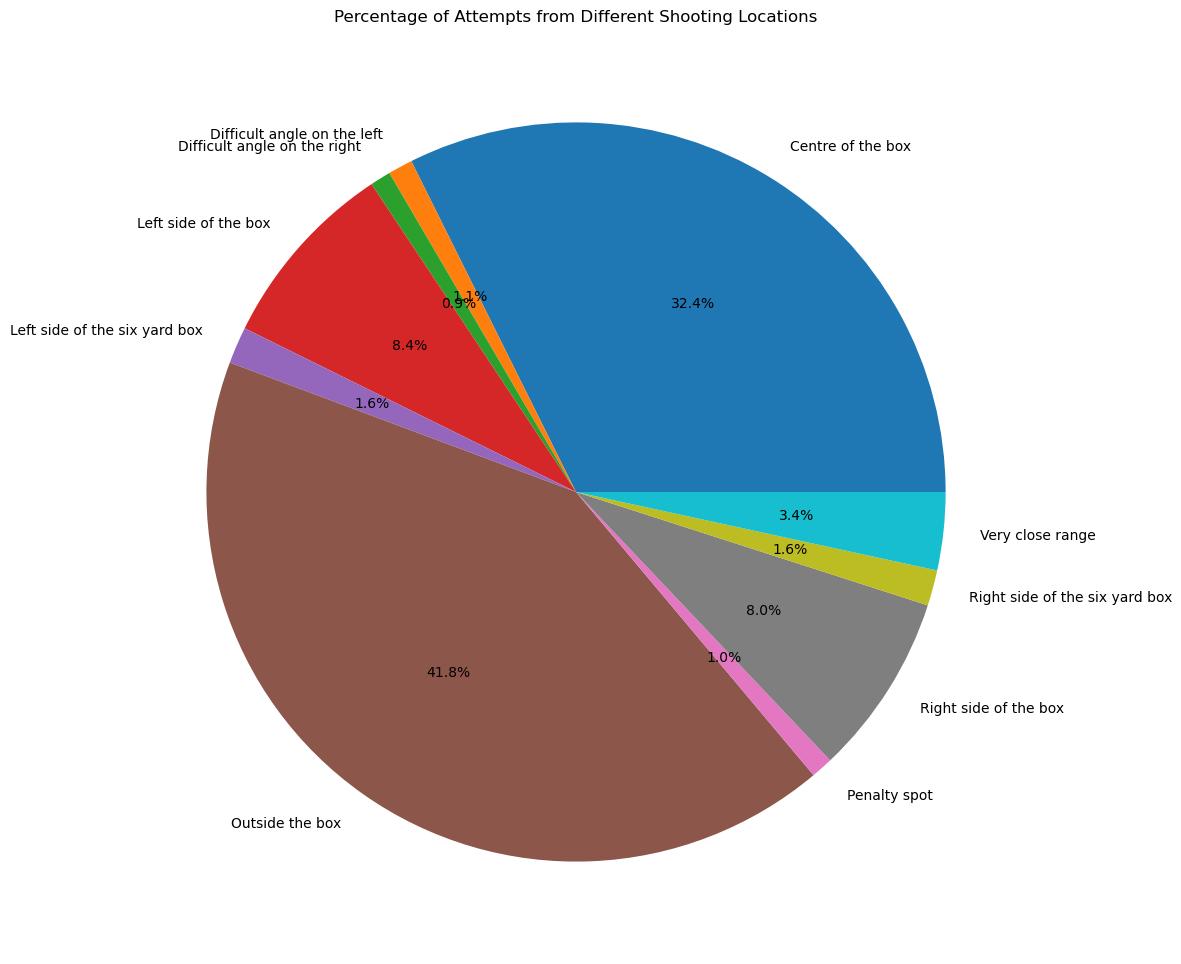

In [15]:
plt.figure(figsize=(12,12))
num_colours = 11
colour_map = plt.cm.get_cmap('tab10', num_colours)
colours = [colour_map(i) for i in range(num_colours)]
plt.pie(attempt_locations_filtered['id_event'],labels = attempt_locations_filtered['location'], autopct = '%1.1f%%', colors = colours)
plt.title('Percentage of Attempts from Different Shooting Locations');

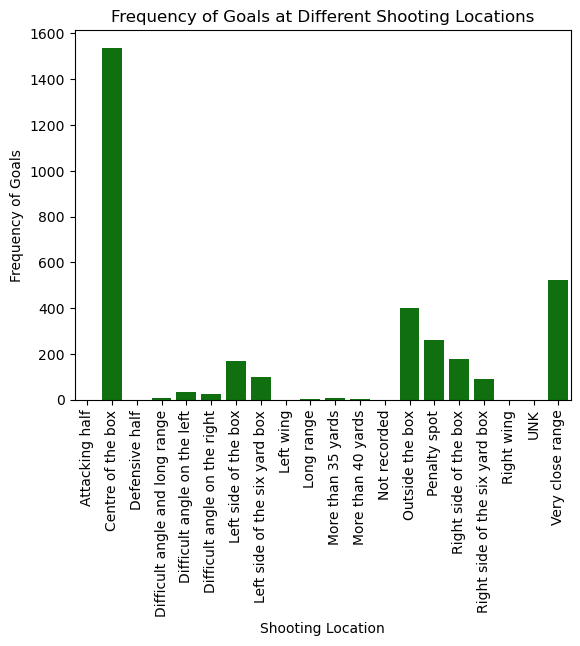

In [16]:
goal_locations_bar = sns.barplot(x = 'location', y = 'id_event', data = goal_locations, color='green')
plt.xticks(rotation = 'vertical')
plt.xlabel('Shooting Location')
plt.ylabel('Frequency of Goals')
plt.title('Frequency of Goals at Different Shooting Locations')
plt.show();

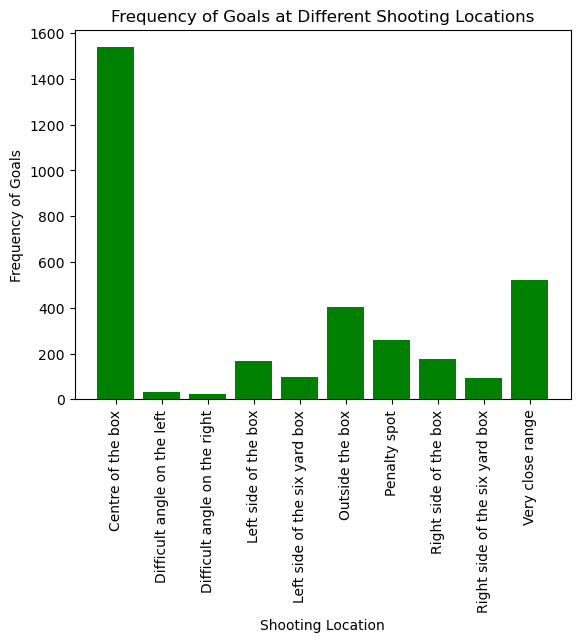

In [17]:
# Applying the same filtering as the Attempts Dataframe
goal_locations_filtered = goal_locations[goal_locations['id_event'] > 10]
goal_locations_filtered = goal_locations_filtered[goal_locations_filtered['location'] != 'Not recorded'] 
goal_locations_filtered_bar = plt.bar(goal_locations_filtered['location'],goal_locations_filtered['id_event'], color = 'green')
plt.xticks(rotation = 'vertical')
plt.xlabel('Shooting Location')
plt.ylabel('Frequency of Goals')
plt.title('Frequency of Goals at Different Shooting Locations')
plt.show();

C:\Users\dmsta\AppData\Local\Temp\ipykernel_5632\3513732999.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colour_map = plt.cm.get_cmap('tab10', num_colours)


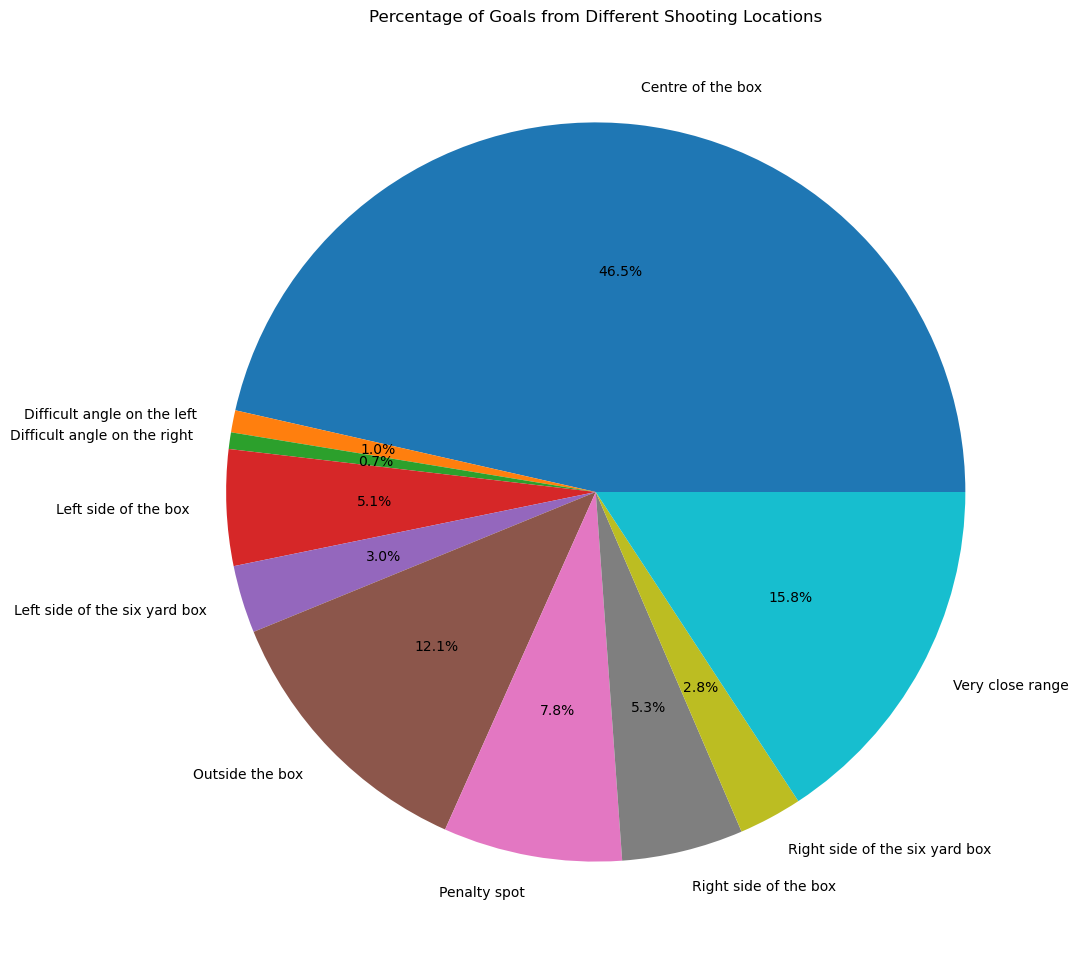

In [18]:
plt.figure(figsize=(12,12))
num_colours = 11
colour_map = plt.cm.get_cmap('tab10', num_colours)
colours = [colour_map(i) for i in range(num_colours)]
plt.pie(goal_locations_filtered['id_event'],labels = goal_locations_filtered['location'], autopct = '%1.1f%%', colors = colours)
plt.title('Percentage of Goals from Different Shooting Locations');

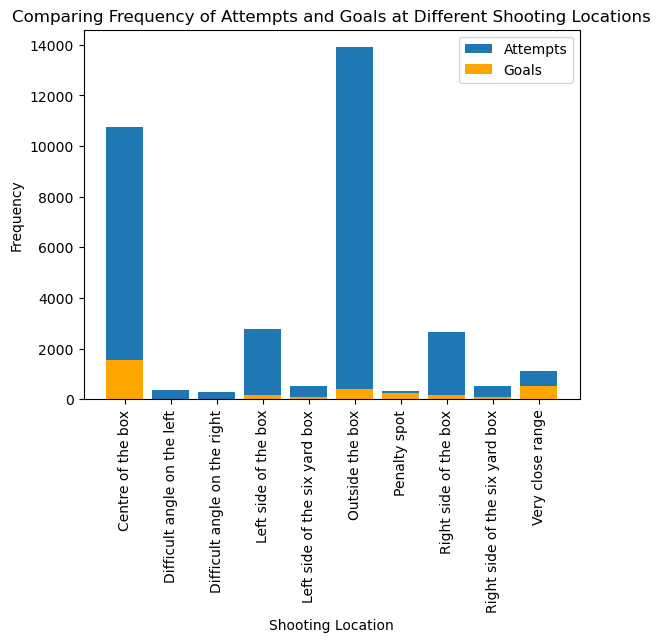

In [19]:
# Overlaying the two bar graphs
plt.bar(attempt_locations_filtered['location'],attempt_locations_filtered['id_event'], label = 'Attempts')
plt.bar(goal_locations_filtered['location'],goal_locations_filtered['id_event'], color = 'orange', label = 'Goals')
plt.xticks(rotation='vertical');
plt.xlabel('Shooting Location')
plt.ylabel('Frequency')
plt.title('Comparing Frequency of Attempts and Goals at Different Shooting Locations')
plt.legend();

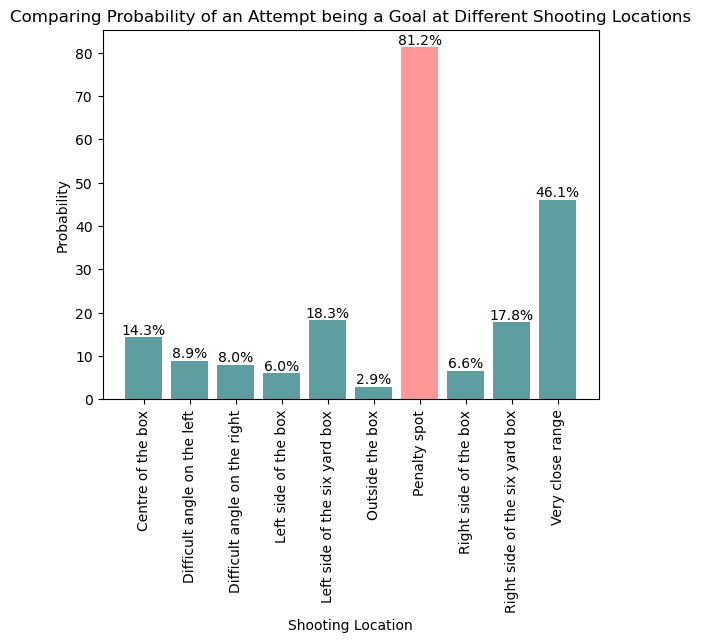

In [20]:
# Success rate of each shooting location - Visualised
proportionalised_attempts = [attempts * 100 / attempts for attempts in attempt_locations_filtered['id_event']]
for goals in [goal_locations_filtered['id_event']]:
    for attempts in [attempt_locations_filtered['id_event']]:
        proportions = [goals * 100 / attempts]
proportions = np.array(proportions).reshape(1,-1)
proportions = proportions[0]
bar = plt.bar(goal_locations_filtered['location'],proportions, color=np.where(proportions==proportions.max(), '#ff9999','cadetblue'), label = 'Goals')
for bar in bar:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.1f}%', ha='center', va='bottom')
plt.xlabel('Shooting Location')
plt.ylabel('Probability')
plt.title('Comparing Probability of an Attempt being a Goal at Different Shooting Locations')
plt.xticks(rotation = 'vertical');

In [21]:
df_attempt = pl_events[pl_events['event_type'] == 'Attempt']
df_attempt = df_attempt[df_attempt['shot_place'] != 'Not recorded']
df_attempt = df_attempt[df_attempt['shot_place'] != 'UNK']
df_goal = df_attempt[df_attempt['is_goal'] == True]

C:\Users\dmsta\AppData\Local\Temp\ipykernel_5632\3514162937.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  shot_places = df_attempt.groupby('shot_place').count().reset_index()


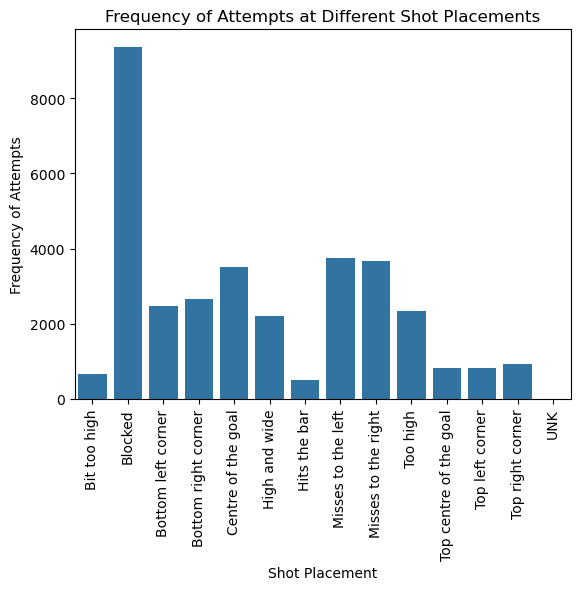

In [22]:
shot_places = df_attempt.groupby('shot_place').count().reset_index()
shot_places_bar = sns.barplot(x = 'shot_place', y = 'id_event', data = shot_places)
plt.xticks(rotation = 'vertical')
plt.xlabel('Shot Placement')
plt.ylabel('Frequency of Attempts')
plt.title('Frequency of Attempts at Different Shot Placements')
plt.show();

C:\Users\dmsta\AppData\Local\Temp\ipykernel_5632\967164084.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  goal_places = df_goal.groupby('shot_place').count().reset_index()


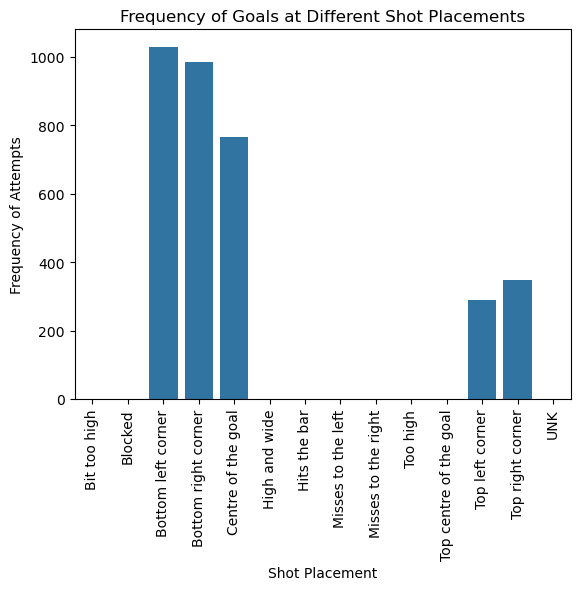

In [23]:
goal_places = df_goal.groupby('shot_place').count().reset_index()
goal_places_bar = sns.barplot(x = 'shot_place', y = 'id_event', data = goal_places)
plt.xlabel('Shot Placement')
plt.ylabel('Frequency of Attempts')
plt.title('Frequency of Goals at Different Shot Placements')
plt.xticks(rotation = 'vertical')
plt.show();

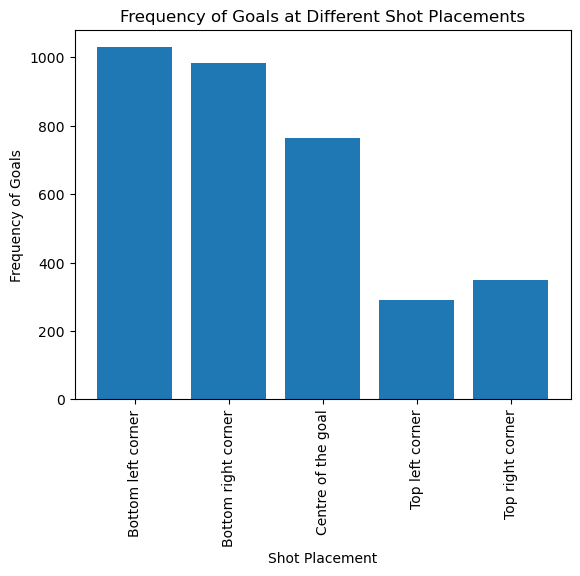

In [24]:
goal_places_filtered = goal_places[goal_places['id_event'] != 0]
goal_places_filtered = goal_places_filtered[goal_places_filtered['shot_place'] != 'UNK']
goal_places_filtered_bar = plt.bar(goal_places_filtered['shot_place'],goal_places_filtered['id_event'])
plt.xticks(rotation = 'vertical')
plt.xlabel('Shot Placement')
plt.ylabel('Frequency of Goals')
plt.title('Frequency of Goals at Different Shot Placements')
plt.show();

C:\Users\dmsta\AppData\Local\Temp\ipykernel_5632\3619556845.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  shot_places_filtered = shot_places_filtered[goal_places['id_event'] != 0]


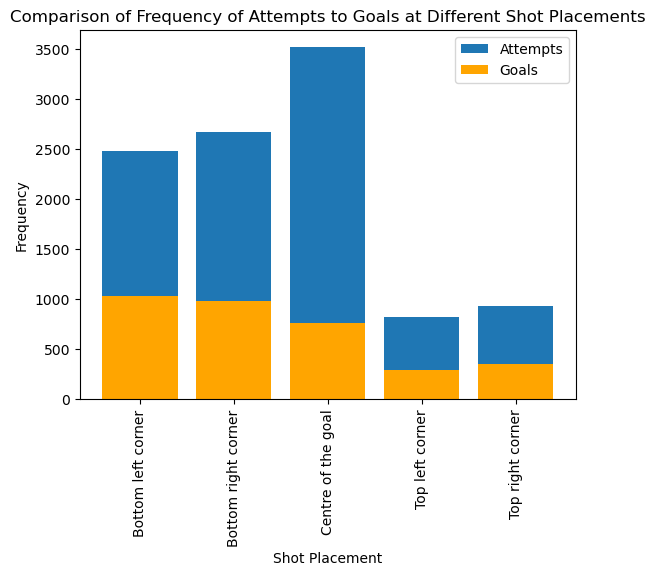

In [25]:
shot_places_filtered = shot_places[goal_places['shot_place'] != 'UNK']
shot_places_filtered = shot_places_filtered[goal_places['id_event'] != 0]
plt.bar(shot_places_filtered['shot_place'],shot_places_filtered['id_event'], label = 'Attempts')
plt.bar(goal_places_filtered['shot_place'],goal_places_filtered['id_event'], color = 'orange', label = 'Goals')
plt.xlabel('Shot Placement')
plt.ylabel('Frequency')
plt.title('Comparison of Frequency of Attempts to Goals at Different Shot Placements')
plt.xticks(rotation='vertical')
plt.legend();

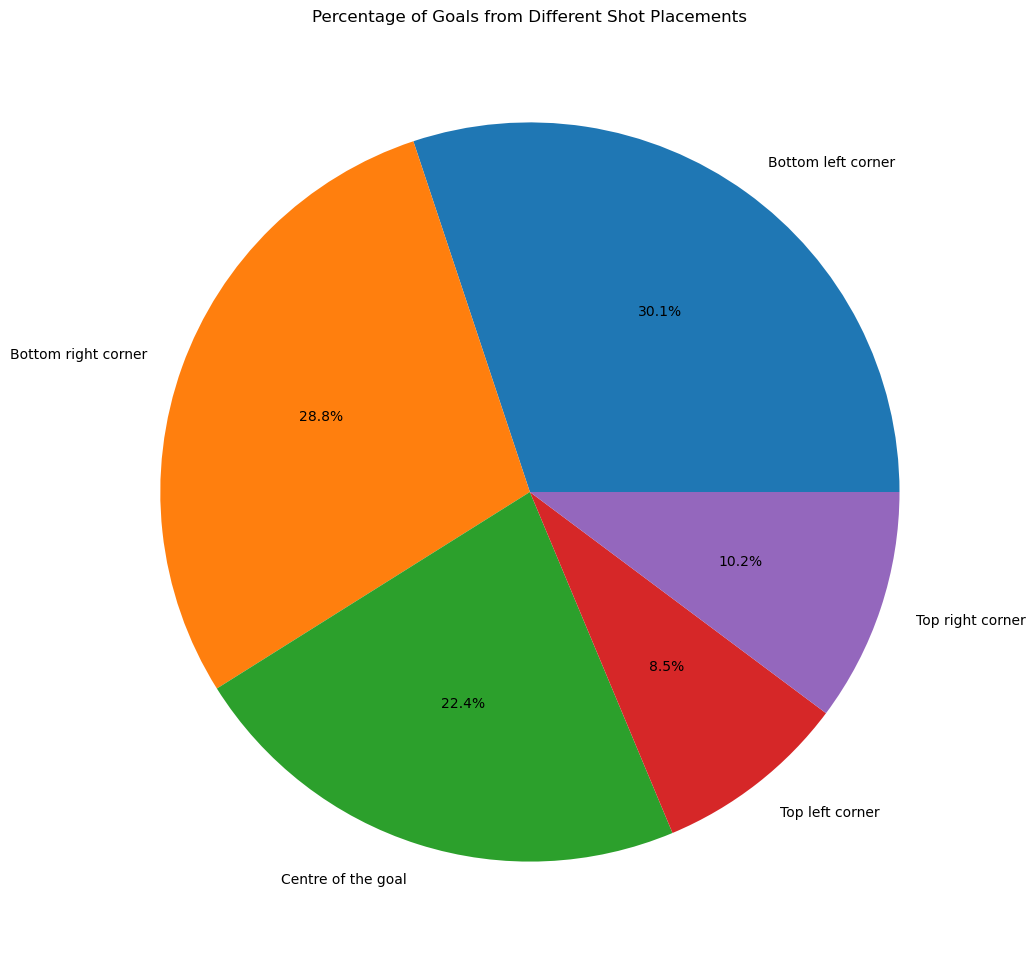

In [26]:
plt.figure(figsize=(12,12))
plt.pie(goal_places_filtered['id_event'],labels = goal_places_filtered['shot_place'], autopct = '%1.1f%%')
plt.title('Percentage of Goals from Different Shot Placements');

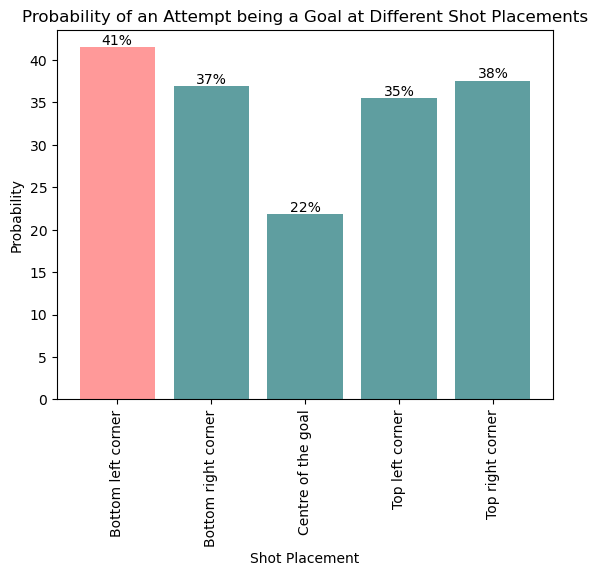

In [27]:
# Success rate of each shooting  - Visualised
proportionalised_shot_places = [attempts * 100 / attempts for attempts in shot_places_filtered['id_event']]
for goals in [goal_places_filtered['id_event']]:
    for attempts in [shot_places_filtered['id_event']]:
        proportions = [goals * 100 / attempts]
proportions = np.array(proportions).reshape(1,-1)
proportions = proportions[0]
bar = plt.bar(goal_places_filtered['shot_place'],proportions, color=np.where(proportions==proportions.max(), '#ff9999','cadetblue'))
# Adding values on top of the bars
for bar in bar:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.0f}%', ha='center', va='bottom')
plt.xticks(rotation = 'vertical');
plt.xlabel('Shot Placement')
plt.ylabel('Probability')
plt.title('Probability of an Attempt being a Goal at Different Shot Placements')
plt.show()

In [28]:
df_attempt = pl_events[pl_events['event_type'] == 'Attempt']
df_attempt = df_attempt[df_attempt['player'] != 'Not recorded']
df_attempt = df_attempt[df_attempt['player'] != 'UNK']
df_goal = df_attempt[df_attempt['is_goal'] == True]

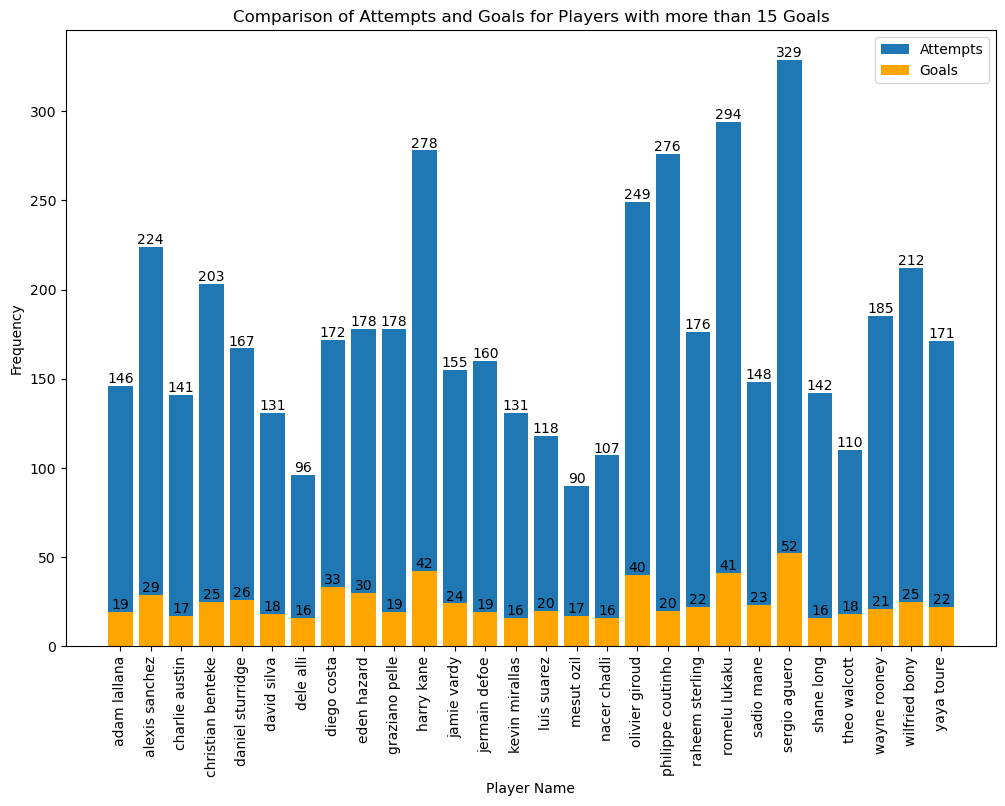

In [39]:
player_attempts = df_attempt.groupby('player').count().reset_index()
player_goals = df_goal.groupby('player').count().reset_index()
player_goals_filtered = player_goals[player_goals['id_event'] > 15]
player_attempts_filtered = player_attempts[player_attempts['player'].isin(player_goals_filtered['player'])]
player_attempts_filtered = player_attempts_filtered.reset_index(drop=True)
player_goals_filtered = player_goals_filtered.reset_index(drop=True)
plt.figure(figsize = (12,8))
bar = plt.bar(player_attempts_filtered['player'],player_attempts_filtered['id_event'], label = 'Attempts')
bar2 = plt.bar(player_goals_filtered['player'],player_goals_filtered['id_event'], color = 'orange', label = 'Goals')
# Adding values on top of the bars
for bar in bar:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, yval, ha='center', va='bottom')
for bar in bar2:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, yval, ha='center', va='bottom')
plt.xticks(rotation='vertical');
plt.xlabel('Player Name')
plt.ylabel('Frequency')
plt.title('Comparison of Attempts and Goals for Players with more than 15 Goals')
plt.legend()
plt.show();

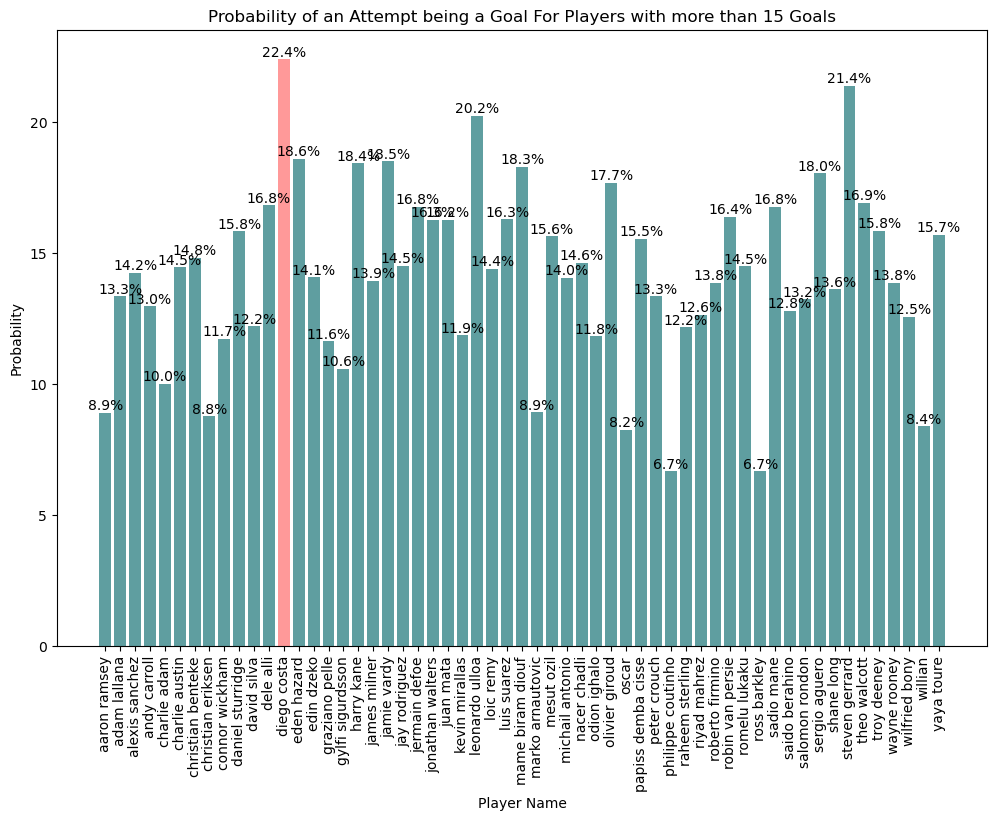

In [30]:
# Success rate of each shooting  - Visualised
proportionalised_player_attempts = [attempts * 100 / attempts for attempts in player_attempts_filtered['id_event']]
for goals in [player_goals_filtered['id_event']]:
    for attempts in [player_attempts_filtered['id_event']]:
        proportions = [goals * 100/ attempts]
proportions = np.array(proportions).reshape(1,-1)
proportions = proportions[0]
plt.figure(figsize = (12,8))
bar = plt.bar(player_goals_filtered['player'],proportions, color=np.where(proportions==proportions.max(), '#ff9999','cadetblue'), label = 'Goals')
for bar in bar:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.1f}%', ha='center', va='bottom')
plt.xticks(rotation = 'vertical')
plt.xlabel('Player Name')
plt.ylabel('Probability')
plt.title('Probability of an Attempt being a Goal For Players with more than 15 Goals');

In [31]:
df_attempt = pl_events[pl_events['event_type'] == 'Attempt']
df_attempt = df_attempt[df_attempt['time'] != 'Not recorded']
df_attempt = df_attempt[df_attempt['time'] != 'UNK']
df_goal = df_attempt[df_attempt['is_goal'] == True]
bins = [0,10,20,30,40,50,60,70,80,90,100]
df_attempt['bin'] = pd.cut(df_attempt['time'],bins)
df_goal['bin'] = pd.cut(df_goal['time'],bins)
attempt_times = df_attempt.groupby('bin')['time'].count().reset_index()
goal_times = df_goal.groupby('bin')['time'].count().reset_index()

C:\Users\dmsta\AppData\Local\Temp\ipykernel_5632\328755080.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_goal['bin'] = pd.cut(df_goal['time'],bins)
C:\Users\dmsta\AppData\Local\Temp\ipykernel_5632\328755080.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  attempt_times = df_attempt.groupby('bin')['time'].count().reset_index()
C:\Users\dmsta\AppData\Local\Temp\ipykernel_5632\328755080.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current beh

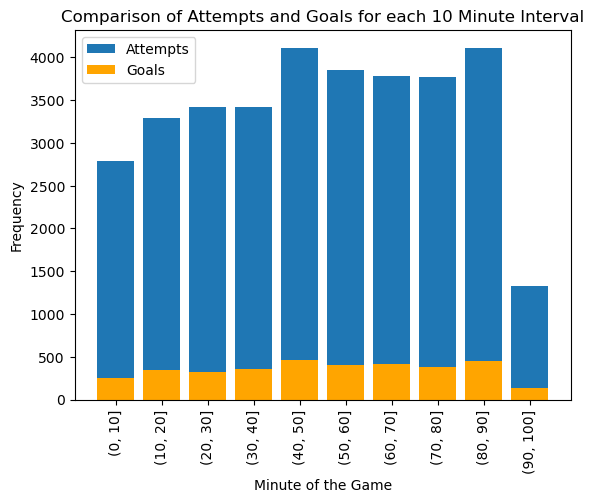

In [32]:
plt.bar(attempt_times['bin'].astype(str),attempt_times['time'], label = 'Attempts')
plt.bar(goal_times['bin'].astype(str),goal_times['time'], color = 'orange', label = 'Goals')
plt.xticks(rotation='vertical');
plt.xlabel('Minute of the Game')
plt.ylabel('Frequency')
plt.title('Comparison of Attempts and Goals for each 10 Minute Interval')
plt.legend()
plt.show();

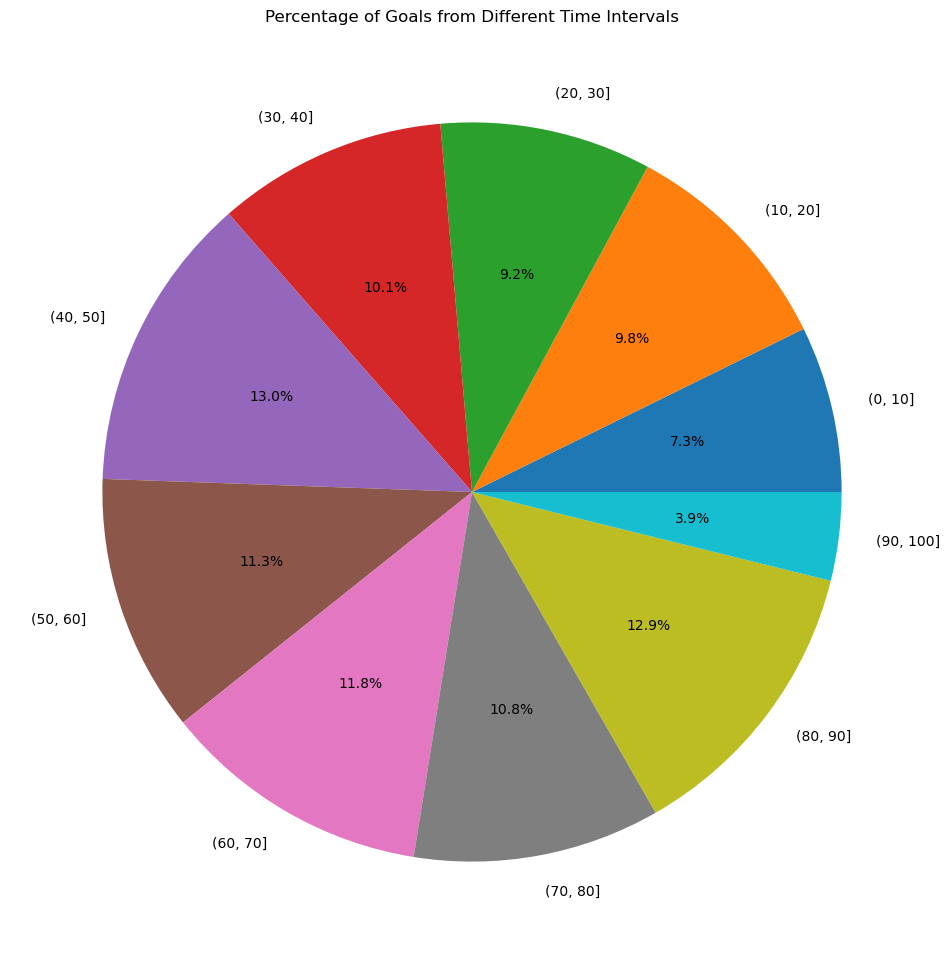

In [33]:
plt.figure(figsize=(12,12))
plt.pie(goal_times['time'],labels = goal_times['bin'], autopct = '%1.1f%%')
plt.title('Percentage of Goals from Different Time Intervals');

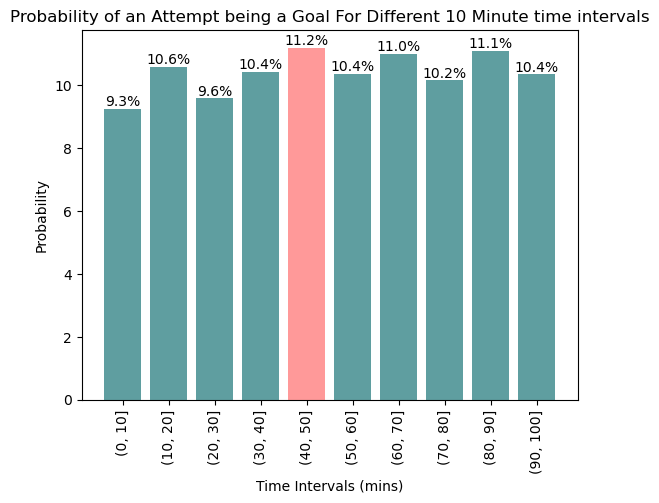

In [34]:
# Success rate of each shooting  - Visualised
proportionalised_attempts_times = [attempts * 100 / attempts for attempts in attempt_times['time']]
for goals in [goal_times['time']]:
    for attempts in [attempt_times['time']]:
        proportions = [goals * 100/ attempts]
proportions = np.array(proportions).reshape(1,-1)
proportions = proportions[0]
bar = plt.bar(goal_times['bin'].astype(str),proportions, color=np.where(proportions==proportions.max(), '#ff9999','cadetblue'), label = 'Goals')
for bar in bar:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.1f}%', ha='center', va='bottom')
plt.xticks(rotation = 'vertical')
plt.xlabel('Time Intervals (mins)')
plt.ylabel('Probability')
plt.title('Probability of an Attempt being a Goal For Different 10 Minute time intervals');

In [35]:
df_attempt = pl_events[pl_events['event_type'] == 'Attempt']
df_attempt = df_attempt[df_attempt['assist_method'] != 'Not recorded']
df_attempt = df_attempt[df_attempt['assist_method'] != 'UNK']
df_goal = df_attempt[df_attempt['is_goal'] == True]

C:\Users\dmsta\AppData\Local\Temp\ipykernel_5632\1586492857.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  assist_method_attempts = df_attempt.groupby('assist_method').count().reset_index()
C:\Users\dmsta\AppData\Local\Temp\ipykernel_5632\1586492857.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  assist_method_goals = df_goal.groupby('assist_method').count().reset_index()


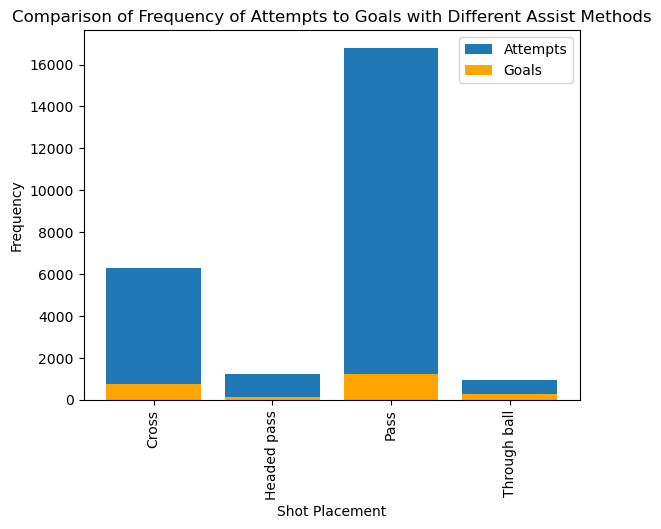

In [36]:
assist_method_attempts = df_attempt.groupby('assist_method').count().reset_index()
assist_method_attempts = assist_method_attempts[assist_method_attempts['assist_method'] != 'UNK']
assist_method_goals = df_goal.groupby('assist_method').count().reset_index()
assist_method_goals = assist_method_goals[assist_method_goals['assist_method'] != 'UNK']
plt.bar(assist_method_attempts['assist_method'],assist_method_attempts['id_event'], label = 'Attempts')
plt.bar(assist_method_goals['assist_method'],assist_method_goals['id_event'], color = 'orange', label = 'Goals')
plt.xlabel('Shot Placement')
plt.ylabel('Frequency')
plt.title('Comparison of Frequency of Attempts to Goals with Different Assist Methods')
plt.xticks(rotation='vertical')
plt.legend();

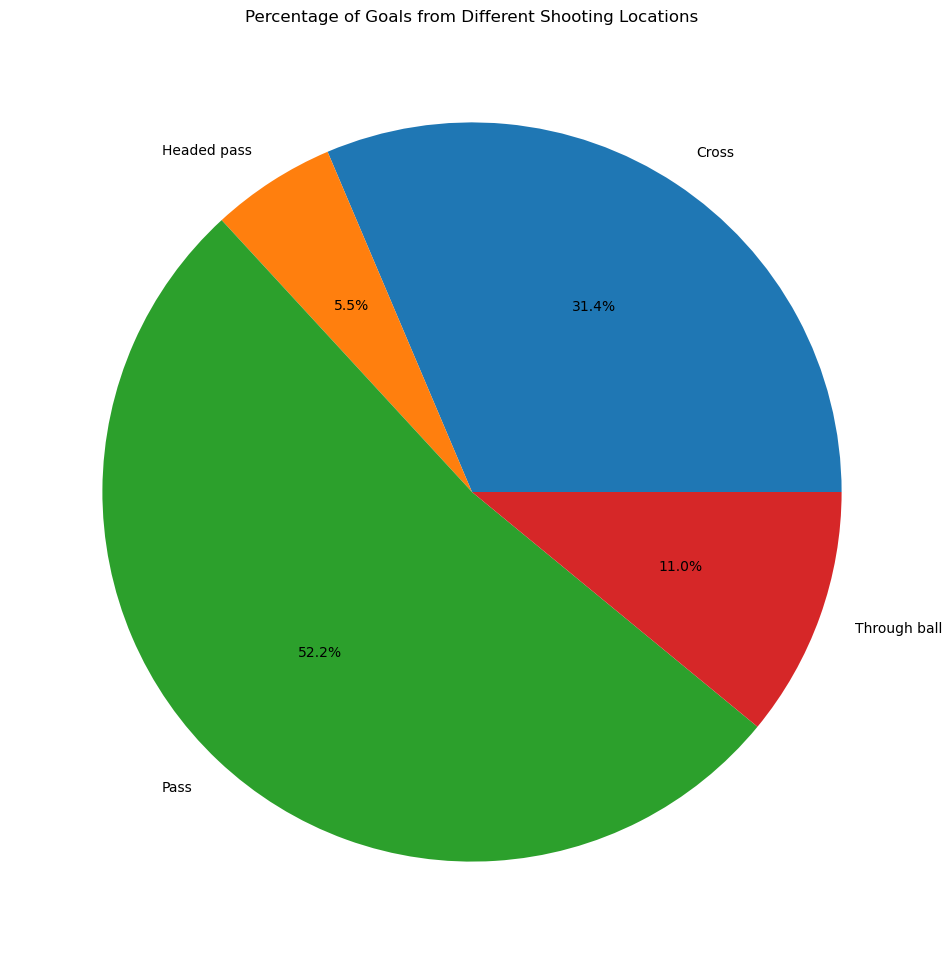

In [37]:
plt.figure(figsize=(12,12))
plt.pie(assist_method_goals['id_event'],labels = assist_method_goals['assist_method'], autopct = '%1.1f%%')
plt.title('Percentage of Goals from Different Shooting Locations');

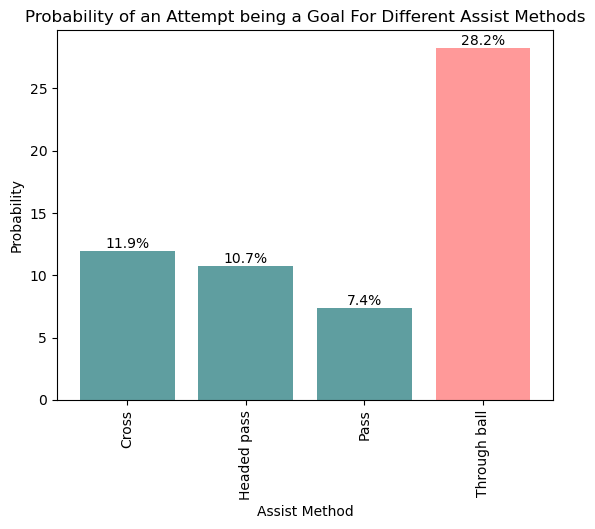

In [38]:
# Success rate of each Assist Method - Visualised
proportionalised_assist_method_attempts = [attempts * 100 / attempts for attempts in assist_method_attempts['id_event']]
for goals in [assist_method_goals['id_event']]:
    for attempts in [assist_method_attempts['id_event']]:
        proportions = [goals * 100/ attempts]
proportions = np.array(proportions).reshape(1,-1)
proportions = proportions[0]
bar = plt.bar(assist_method_goals['assist_method'],proportions, color=np.where(proportions==proportions.max(), '#ff9999','cadetblue'), label = 'Goals')
for bar in bar:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.1f}%', ha='center', va='bottom')
plt.xticks(rotation = 'vertical')
plt.xlabel('Assist Method')
plt.ylabel('Probability')
plt.title('Probability of an Attempt being a Goal For Different Assist Methods');